In [0]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


### 1. Formulate the statement of the interpolation problem with Cubic Spline [mathematical formula]

### Interpolation Problem
The interpolation task is the problem of finding intermediate values of a quantity from an available discrete set of known values. Based on these sets, it is required to construct a function on which other obtained values could fall with high accuracy. This problem is called approximation. Interpolation is a kind of approximation in which the curve of the constructed function passes exactly through the available data points.

### Cubic Spline
Cubic spline interpolation is a special case for Spline interpolation.

Spline interpolation is a form of interpolation where the interpolant is a special type of piecewise polynomial called a spline.

Spline $S(x)$ is a function satisfying:
1. $S(x)$ in $C^{2}[a,b]$;
2. On each subinterval $[x_{i-1},x_{i}],S(x)$ $[x_{i-1},x_{i}], S(x)$ is a polynomial of degree 3, where $i=1,... ,n.$
3. $S(x_{i})=y_{i},$ $S(x_{i})=y_{i},$ for all $i=0,1,... ,n.$

Let us assume that

$S(x)=$ {\begin{array}{rl}S_{1}(x),&x_{0}\leq x\leq x_{1}\\\cdots &\\S_{i}(x),&x_{i-1}<x\leq x_{i}\\\cdots &\\S_{n}(x),&x_{n-1}<x\leq x_{n}\end{array}}

where each $S_{i}=a_{i}+b_{i}x+c_{i}x^{2}+d_{i}x^{3}(d_{i}\neq 0)$ is a cubic function, $i=1,\cdots ,n$



### 2. Formulate the functional and differential compatibility conditions [mathematical formula]

### Functional conditions:

$\delta S(x)|_{x=x_i} = {S_i}(x)-f_i(x_i)=0$


### Differential conditions

$\delta S''(x)|_{x=x_i} = {S_i''}(x)-f_i''(x_i)=0$

### 3. Formulate stitching conditions [mathematical formula]

$S_{m,i-1}^{(p_2)}(x)|_{x=x_i}=S_{m,i}^{(p_2)}(x)|_{x=x_i},i=\overline{1,n-1}$

### 4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]

The functional condition provides a solution to the interpolation problem.

But using only functional condition leads to the fact that derivatives at the junction points of partial segments have discontinuities. If the function to be performed is sufficiently smooth, then its derivatives are also smooth, and therefore they must be continuous at all internal nodes. This is the reason to add stitching conditions.

But these conditions do not provide solution of the problem, because we do not have enough equations to find unknown variables, so we add differential conditions.

### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]

Polynomial:

$S_{3, i}=a_{0, i}+a_{1,i}(x - x_i)+a_{2, i}(x - x_i)^{2}+a_{3, i}(x - x_i)^{3}$

Let:

$h_i = x_i - x_{i - 1}$

$\delta f_i = f_{i + 1} - f_i$

$\delta m_i = m_{i + 1} - m_i$


Use 2 differential condition with $p_1$ = {0, 2} and get 4 equations:

1. Make 4 equations and find $a_{0, i}, a_{1, i}, a_{2, i}, a_{3, i}$
2. And now we have known variables: $f_i$ and unknown: $m_i$
3. To find them, use stitching condition:

  $S'_{3, i}(x) = S'_{3, i - 1}(x)$
4. Now we get dependence between them:
  $\frac{h_i} {6} * m_{i - 1} + \frac{h_i + h_{i + 1}} {3} * m_i + \frac{h_{i + 1}} {6} * m_{i + 1} = \frac{\delta f_i} {h_{i + 1}} - \frac{\delta f_{i - 1}} {h_i}$

So, we see that we have  dependence of the second derivatives at the grid nodes on the increment of the function($m_i$ and $f_i$)

### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]




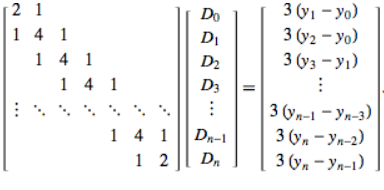




### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]

Unlike the open-curve case, the second derivatives at the
end points are not known and must be determined from, whose matrix is tridiagonal, plus entries in the topright and bottom-left positions.
If the curve is instead closed, the system becomes


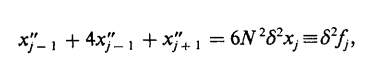






### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]

### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

In [0]:
### YOUR TEXT/CODE HERE










### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]

In [0]:
### YOUR CODE HERE

class Cubic_interpolator( pair[] points ) {
    double[] answer_coefficients;
    void create_equations()
    void construct_matrix()
    void calculate_vector_of_coefficients()
}







### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

When interpolating a given function f by a polynomial of degree n at the nodes x0,...,xn we get the error
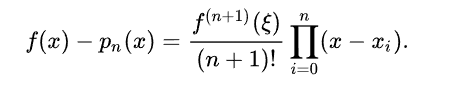

where

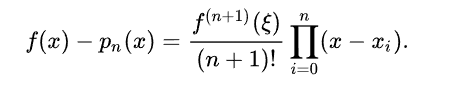
is the notation for divided differences.

If f is n + 1 times continuously differentiable on a closed interval I and {\displaystyle p_{n}(x)}p_{n}(x) is a polynomial of degree at most n that interpolates f at n + 1 distinct points {xi} (i=0,1,...,n) in that interval, then for each x in the interval there exists ξ in that interval such that

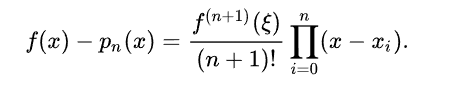







### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

the cubic spline method
requires solving a tridiagonal matrix-vector equation with an
O(n) computational time complexity where n is the number of
data measurements.
Even an O(n) time complexity may be too
much in some time-ciritical applications, such as continuously


The procedure for composing the spline function of order m that interpolates n data is roughly divided into two stages: (1) constructing the matrix An that transforms the fl-spline coefficient vector c into the sample value vector s; and (2) calculating the vector c.

### Congrats!

$$\int_{x_i}^{x_{i+1}} \hat{f_m}(x,\hat{a}) \,dx= I_{i}^{i+1}, i=0,1,...,m$$


$$\int_{x_0}^{x_{i}} \hat{f_m}(x,\hat{a}) \,dx= I_{0}^{i}, i=1,...,m+1$$
